# **Labelin Sentimen**

Labelin sentimen disini menggunakan Library Textblob. Cara kerja library ini yakni dengan menghitung polaritas sentimen menggunakan metode sentiment dari objek TextBlob dan mengambil nilai polaritasnya, dan menentukan hasil polaritas tersebut apakah bersentimen netral, negatif, atau positif. Untuk catatan, library ini hanya bisa mendektesi bahasa inggris saja, maka dari itu data sebelum diproses labelin diubah terlebih dahulu kedalam bahasa inggris menggunakan Library googletrans.

1. import modul yang dibutukan, baik untuk dataframe, translate, dan labelin sentimen.

In [1]:
#modul untuk dataframe
import pandas as pd

#modul yang dibutuhkan untuk translate
!pip install googletrans==3.1.0a0
import googletrans
from googletrans import Translator
translator = Translator()
pd.set_option('max_colwidth', 300)

#Modul Labelin Sentimen
from textblob import TextBlob

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=80800fb455047e7b48802d593a591792925c62ed1c671757d4c932166694f00a
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling c

2. Memanggil dataset yang akan diproses. Hasil preprocessing data

In [2]:
#masukan data hasil preprocessing
df = pd.read_csv('preprocessing-nu-1.csv')
df.head()

,full_text,id_str,created_at,username,user_id_str,lang,location,quote_count,reply_count,retweet_count,...,source,target,remove_user,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal,stemming,to_sentence
0,@tempodotco Dibayar brp tuh @nahdlatululama Ama 02?,1.770000e+32,2024-04-01 00:42:32+00:00,SManikmoyo,1.240000e+32,in,Russia,0,0,0,...,SManikmoyo,tempodotco,Dibayar brp tuh Ama 02?,Dibayar brp tuh Ama,dibayar brp tuh ama,"['dibayar', 'brp', 'tuh', 'ama']","['dibayar', 'berapa', 'tuh', 'sama']",['dibayar'],['bayar'],bayar
1,@ZoelHayat Makanya di Indonesia ini mayoritas ummat islam tp sering menyimpang dari ajaran islam. Penyebab utamanya krn IQ jongkok &amp; integritas rendah. Sorry ormas islam yg sering melakukan kePANDIRan berjamaah itu NU. Cb aja cek 3 wanita itu sy yakin,1.770000e+29,2024-04-01 00:54:53+00:00,Anti_Bajingan,1.922291e+09,in,"Trenggalek, Indonesia",0,0,0,...,Anti_Bajingan,ZoelHayat,Makanya di Indonesia ini mayoritas ummat islam tp sering menyimpang dari ajaran islam. Penyebab utamanya krn IQ jongkok &amp; integritas rendah. Sorry ormas islam yg sering melakukan kePANDIRan berjamaah itu NU. Cb aja cek 3 wanita itu sy yakin,Makanya Indonesia ini mayoritas ummat islam sering menyimpang dari ajaran islam Penyebab utamanya krn jongkok amp integritas rendah Sorry ormas islam sering melakukan kePANDIRan berjamaah itu aja cek wanita itu yakin,makanya indonesia ini mayoritas ummat islam sering menyimpang dari ajaran islam penyebab utamanya krn jongkok amp integritas rendah sorry ormas islam sering melakukan kepandiran berjamaah itu aja cek wanita itu yakin,"['makanya', 'indonesia', 'ini', 'mayoritas', 'ummat', 'islam', 'sering', 'menyimpang', 'dari', 'ajaran', 'islam', 'penyebab', 'utamanya', 'krn', 'jongkok', 'amp', 'integritas', 'rendah', 'sorry', 'ormas', 'islam', 'sering', 'melakukan', 'kepandiran', 'berjamaah', 'itu', 'aja', 'cek', 'wanita', '...","['makanya', 'indonesia', 'ini', 'mayoritas', 'ummat', 'islam', 'sering', 'menyimpang', 'dari', 'ajaran', 'islam', 'penyebab', 'utamanya', 'karena', 'jongkok', 'amp', 'integritas', 'rendah', 'sorry', 'ormas', 'islam', 'sering', 'melakukan', 'kepandiran', 'berjamaah', 'itu', 'saja', 'cek', 'wanita...","['indonesia', 'mayoritas', 'ummat', 'islam', 'menyimpang', 'ajaran', 'islam', 'penyebab', 'utamanya', 'jongkok', 'integritas', 'rendah', 'sorry', 'ormas', 'islam', 'kepandiran', 'berjamaah', 'cek', 'wanita']","['indonesia', 'mayoritas', 'ummat', 'islam', 'simpang', 'ajar', 'islam', 'sebab', 'utama', 'jongkok', 'integritas', 'rendah', 'sorry', 'ormas', 'islam', 'pandir', 'jamaah', 'cek', 'wanita']",indonesia mayoritas ummat islam simpang ajar islam sebab utama jongkok integritas rendah sorry ormas islam pandir jamaah cek wanita
2,@tants_dj @evylagi Ustad2 nu yg bener2 luas hatinya ya buya yahya ustad somad padahal mereka lo mainnya sama ustad2 MU .. segelintir orang yg ilmunya dangkal tp mulutnya lebar yg bikin ormas malah makin kacau,1.770000e+31,2024-04-01 01:19:07+00:00,xinyuthingker,1.330000e+31,in,Mixxtopia,0,1,0,...,xinyuthingker,tants_dj,Ustad2 nu yg bener2 luas hatinya ya buya yahya ustad somad padahal mereka lo mainnya sama ustad2 MU .. segelintir orang yg ilmunya dangkal tp mulutnya lebar yg bikin ormas malah makin kacau,Ustad bener luas hatinya buya yahya ustad somad padahal mereka mainnya sama ustad segelintir orang ilmunya dangkal mulutnya lebar bikin ormas malah makin kacau,ustad bener luas hatinya buya yahya ustad somad padahal mereka mainnya sama ustad segelintir orang ilmunya dangkal mulutnya lebar bikin ormas malah makin kacau,"['ustad', 'bener', 'luas', 'hatinya', 'buya', 'yahya', 'ustad', 'somad', 'padahal', 'mereka', 'mainnya', 'sama', 'ustad', 'segelintir', 'orang', 'ilmunya', 'dangkal', 'mulutnya', 'lebar', 'bikin', 'ormas', 'malah', 'makin', 'kacau']","['ustad', 'benar', 'luas', 'hatinya', 'buya', 'yahya', 'ustad', 'somad', 'padahal', 'mereka', 'mainnya', 'sama', 'ustad', 'segelintir', 'orang', 'ilmunya', 'dangkal', 'mulutnya', 'lebar', '

3. Melihat bahasa dan kode bahasa apa saja yang tersedia didalam library googletrans.

In [3]:
# cari bahasa
lang_df = pd.DataFrame.from_dict(googletrans.LANGUAGES,  orient='index', columns=['Language'])
lang_df.head()

,Language
af,afrikaans
sq,albanian
am,amharic
ar,arabic
hy,armenian


4. Karena hasil code sebelum menunjukan banyaknya bahasa yang tersedia, untuk alternatif bisa langsung mencari bahasa dan kode bahasa yang akan digunakan. Disini menggunakan bahasa inggris dan bahasa indonesia. Kode bahasa ini bertujuan untuk proses translate nanti.

In [4]:
# cari code indonesia, dan inggris
lang_df[lang_df.Language.isin(['english', 'indonesian'])]

,Language
en,english
id,indonesian


terlihat bahwa kode bahasa dari bahasa inggris yakni en, dan bahasa indonesia yakni id.

5. Proses translate. Untuk data yang dipakai yakni hasil dari preprocessing text sebelumnya yang mana yakni pada kolom to_sentence. Proses translate dilakukan dengan menggunakan kode bahasa yang sudah dicari tadi. untuk fungsi src merupakan kode untuk data bahasa yang kita punya, dan dest merupakan kode untuk data bahasa yang ingin kita ubah. Setelah proses translate berhasil, data translate akan di masukan kedalam kolom baru bernama english.

In [5]:
#Translate ke English
translate = pd.DataFrame(df['to_sentence']) #disini labelin menggunakan hasil akhir dari preprocessing data
translate['english'] = translate['to_sentence'].apply(lambda x: translator.translate(x, src='id', dest='en').text)
translate.head()

,to_sentence,english
0,bayar,pay
1,indonesia mayoritas ummat islam simpang ajar islam sebab utama jongkok integritas rendah sorry ormas islam pandir jamaah cek wanita,indonesia the majority of muslims are deviant from the teachings of islam the main reason is squatting low integrity sorry islamic mass organizations are stupid congregation check women
2,ustad luas hati buya yahya ustad somad main ustad gelintir orang ilmu dangkal mulut lebar bikin ormas kacau,ustad broad heart buya yahya ustad somad main ustad twist people shallow knowledge wide mouth makes mass organizations chaotic
3,bukti politik praktik bantah sekjen kemarin bicara pkb bela sampeyan ngincer tum pkb aku gelagat,"political evidence of the secretary general's rebuttal practice yesterday when speaking about the pkb, defending you, I'm trying to act on the pkb"
4,santai aku ucap deportasi,I'll just say deportation


6. Proses pelabelan dengan Textblob. Disini memakai kolom dari translate, kemudian dilakukan perhitungan polaritas sentimen menggunakan metode sentiment dari objek TextBlob dan mengambil nilai polaritasnya. Untuk nilai polaritas diatas > 0.0 itu sentimen positif, dan untuk sebaliknya itu sentimen negatif, untuk netral memiliki nilai polaritas 0.0.

In [6]:
# Membuat list untuk menyimpan hasil analisis
results = []

# Analisis setiap teks yang sudah diubah ke dalam bahasa Inggris
for index, row in translate.iterrows():
    teks = row["english"]  # Kolom yang sudah ditranslate
    blob = TextBlob(teks)
    polarity = blob.sentiment.polarity

    if polarity > 0.0:
        sentiment = "Positif"
    elif polarity < -0.0:
        sentiment = "Negatif"
    else:
        sentiment = "Netral"

    results.append({
        "to_sentence": row["to_sentence"],  # Kolom tweet sebelum ditranslate
        "english": teks,   # Kolom tweet yang sudah ditranslate
        "polarity": polarity,
        "sentimen": sentiment
    })

In [7]:
# Membuat DataFrame dari hasil analisis
translate = pd.DataFrame(results)
translate.head()

,to_sentence,english,polarity,sentimen
0,bayar,pay,0.000000,Netral
1,indonesia mayoritas ummat islam simpang ajar islam sebab utama jongkok integritas rendah sorry ormas islam pandir jamaah cek wanita,indonesia the majority of muslims are deviant from the teachings of islam the main reason is squatting low integrity sorry islamic mass organizations are stupid congregation check women,-0.283333,Negatif
2,ustad luas hati buya yahya ustad somad main ustad gelintir orang ilmu dangkal mulut lebar bikin ormas kacau,ustad broad heart buya yahya ustad somad main ustad twist people shallow knowledge wide mouth makes mass organizations chaotic,-0.051042,Negatif
3,bukti politik praktik bantah sekjen kemarin bicara pkb bela sampeyan ngincer tum pkb aku gelagat,"political evidence of the secretary general's rebuttal practice yesterday when speaking about the pkb, defending you, I'm trying to act on the pkb",0.025000,Positif
4,santai aku ucap deportasi,I'll just say deportation,0.000000,Netral


7. Menghapus kolom english yang sudah tidak digunakan kembali.

In [8]:
#menghapus kolom translate
del(translate["english"])
translate.head()

,to_sentence,polarity,sentimen
0,bayar,0.000000,Netral
1,indonesia mayoritas ummat islam simpang ajar islam sebab utama jongkok integritas rendah sorry ormas islam pandir jamaah cek wanita,-0.283333,Negatif
2,ustad luas hati buya yahya ustad somad main ustad gelintir orang ilmu dangkal mulut lebar bikin ormas kacau,-0.051042,Negatif
3,bukti politik praktik bantah sekjen kemarin bicara pkb bela sampeyan ngincer tum pkb aku gelagat,0.025000,Positif
4,santai aku ucap deportasi,0.000000,Netral


8. Simpan kedalam format csv hasilnya.

In [9]:
#simpan kedalam csv
translate.to_csv('labelin_sentimen-nu-1.csv', sep=',', index=False)

# **Jumlah dan Presentase Data Berdasarkan Jenis Sentimen**

Menghitung jumlah data berdasarkan sentimennya dengan menggunakan fungsi code value_counts(). Kemudian menghitung presentase dari jumlah tersebut dengan membulatkan presentase menjadi satu angka desimal, dan membuat DataFrame baru yang berisi hasilnya.

In [10]:
sentimen_counts = translate['sentimen'].value_counts()  #Menghitung jumlah data persentimennya
total_data = len(translate)
sentimen_percentages = (sentimen_counts / total_data) * 100    #Menghitung presentase
sentimen_percentages = sentimen_percentages.round(1).astype(str) + '%'    #Membuat 1 angka dibelakang koma
result_df = pd.DataFrame({'Sentimen': sentimen_counts.index, 'Jumlah': sentimen_counts.values, 'Presentase': sentimen_percentages.values})
result_df

,Sentimen,Jumlah,Presentase
0,Netral,1548,49.8%
1,Positif,1055,33.9%
2,Negatif,506,16.3%


Visualisasinya dalam bentuk diagram pie dengan library matplotlib.

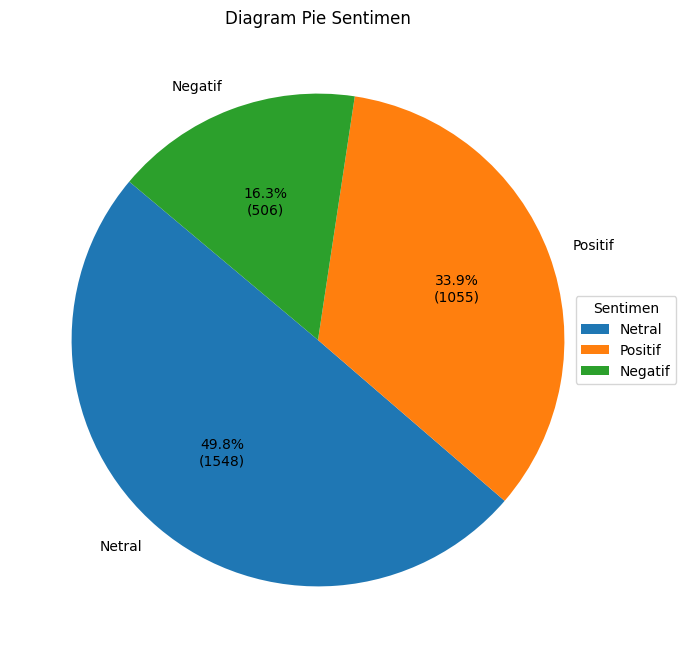

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(sentimen_counts, labels=sentimen_counts.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(sentimen_counts) / 100),
        startangle=140)

plt.legend(sentimen_counts.index, title='Sentimen', loc='center', bbox_to_anchor=(1, 0.5))
plt.title('Diagram Pie Sentimen')

plt.savefig('diagram_sentimen.png')  # Gantilah 'diagram_sentimen.png' sesuai dengan nama file yang Anda inginkan
plt.show()
plt.close()

Diagram Batang.

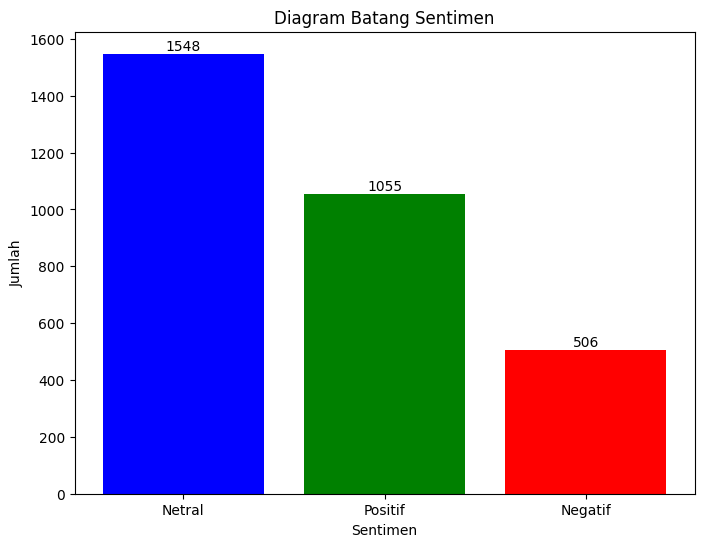

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

#sentimen count
sentimen_counts = translate['sentimen'].value_counts()

#mengatur visualisasi diagram batang
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']  #pemilihan warna (opsional)

#membuat plot diagram batang
bars = plt.bar(sentimen_counts.index, sentimen_counts.values, color=colors)

#menambahkan nilai di atas setiap batang
for bar, count in zip(bars, sentimen_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, count + 0.5, str(count), ha='center', va='bottom')

#pemberian label dan judul
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Diagram Batang Sentimen')

plt.savefig('diagram_batang_sentimen.png')
plt.show()
plt.close()